In [11]:
import cv2
import os
import os.path as osp
import random

In [6]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [2]:
img = cv2.cvtColor(cv2.imread('images.jpeg'), cv2.COLOR_BGR2RGB)

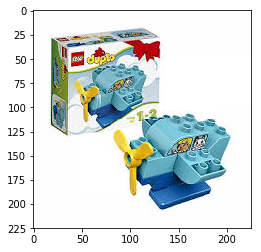

In [4]:
plt.imshow(img)
plt.show()

In [19]:

def rotateImage(image, angle):
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    return result

In [20]:
def rotateImageWithProb(image, angle, prob):
    if random.random() > prob:
        return rotateImage(image, angle)
    else:
        return image

In [50]:
def changeBrightness(image, value, prob):
    if random.random() > prob:
        hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) #convert it to hsv

        h, s, v = cv2.split(hsv)
        lim = 255 - value
        v[v > lim] = 255
        v[v <= lim] += value
        final_hsv = cv2.merge((h, s, v))

        img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
        return img
    else:
        return image

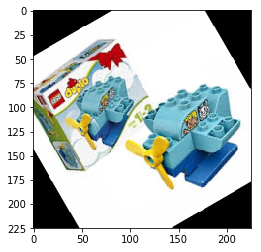

In [63]:
plt.imshow(rotateImageWithProb(img1, 30,0.3))
plt.show()

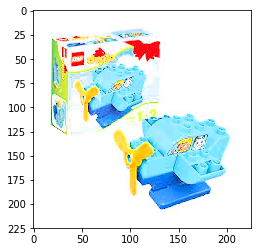

In [56]:
plt.imshow(changeBrightness(img1, 100, 0.1))
plt.show()

In [54]:
np.save('test.npy', img)

In [55]:
img1 = np.load('test.npy')